<div style="border-radius:10px;
            border : black solid;
            background-color: #3b1aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> 🏚️🏡USA Housing🏡🏚️  </center></h2> 

    


<img src ='https://photonet.hotpads.com/search/listingPhoto/Postlets/RT13519476/0001_820946847_large.jpg' width = 600>|

<h2 style='; font-weight: bold; font-size:150%; color:red'><center> ✏️✏️Purpose of the Project ✏️✏️</center></h2>  
<b> Exploratory data analysis (EDA) is one of the most significant methods to examine the data we have. In this project, we are going to explore the hidden patterns in the dataset and extract information from them. </b>

We are going to use the USA_Housing dataset. Since house price is a continuous variable, this is a regression problem. The data contains the following columns:

- 'Avg. Area Income': Avg. The income of residents of the city house is located in.
- 'Avg. Area House Age': Avg Age of Houses in the same city
- 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in the same city
- 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in the same city
- 'Area Population': The population of city house is located in
- 'Price': Price that the house sold at
- 'Address': Address for the house




# Importing Neccessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



# Sklearn package used for Machine learning

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge


from sklearn.metrics import r2_score,mean_absolute_percentage_error, mean_squared_error
from sklearn import metrics


# Loading and Reading Data

In [3]:
dataset = 'USA_Housing.csv'
df = pd.read_csv(dataset)
df.head(10)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   
5               NaN             4.988408                        NaN   
6               NaN             6.025336                        NaN   
7               NaN             6.989780                        NaN   
8               NaN             5.362126                        NaN   
9               NaN             4.423672                        NaN   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   
5                          4.04      26748.42842  1.068138e+06   
6                          3.41      60828.24909  1.502056e+06   
7                          2.42      36516.35897  1.573937e+06   
8                          2.30      29387.39600  7.988695e+05   
9                          6.10      40149.96575  1.545155e+06   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386  
5  06039 Jennifer Islands Apt. 443\nTracyport, KS...  
6  4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...  
7     972 Joyce Viaduct\nLake William, TN 17778-6483  
8                          USS Gilbert\nFPO AA 20957  
9                   Unit 9446 Box 0958\nDPO AE 97025

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
len(df.columns)

7

In [6]:
df.shape

(5000, 7)

# Descriptive Statistics ( Univariate Analysis)

In [7]:
df.describe().T

count          mean            std  \
Avg. Area Income              4990.0  6.858472e+04   10651.192423   
Avg. Area House Age           5000.0  5.977222e+00       0.991456   
Avg. Area Number of Rooms     4995.0  6.987693e+00       1.005938   
Avg. Area Number of Bedrooms  4994.0  3.981874e+00       1.234497   
Area Population               5000.0  3.616352e+04    9925.650114   
Price                         5000.0  1.232073e+06  353117.626584   

                                       min            25%           50%  \
Avg. Area Income              17796.631190   61481.465105  6.879767e+04   
Avg. Area House Age               2.644304       5.322283  5.970429e+00   
Avg. Area Number of Rooms         3.236194       6.299156  7.002940e+00   
Avg. Area Number of Bedrooms      2.000000       3.140000  4.050000e+00   
Area Population                 172.610686   29403.928700  3.619941e+04   
Price                         15938.657920  997577.135075  1.232669e+06   

                                       75%           max  
Avg. Area Income              7.577915e+04  1.077017e+05  
Avg. Area House Age           6.650808e+00  9.519088e+00  
Avg. Area Number of Rooms     7.665622e+00  1.075959e+01  
Avg. Area Number of Bedrooms  4.490000e+00  6.500000e+00  
Area Population               4.286129e+04  6.962171e+04  
Price                         1.471210e+06  2.469066e+06

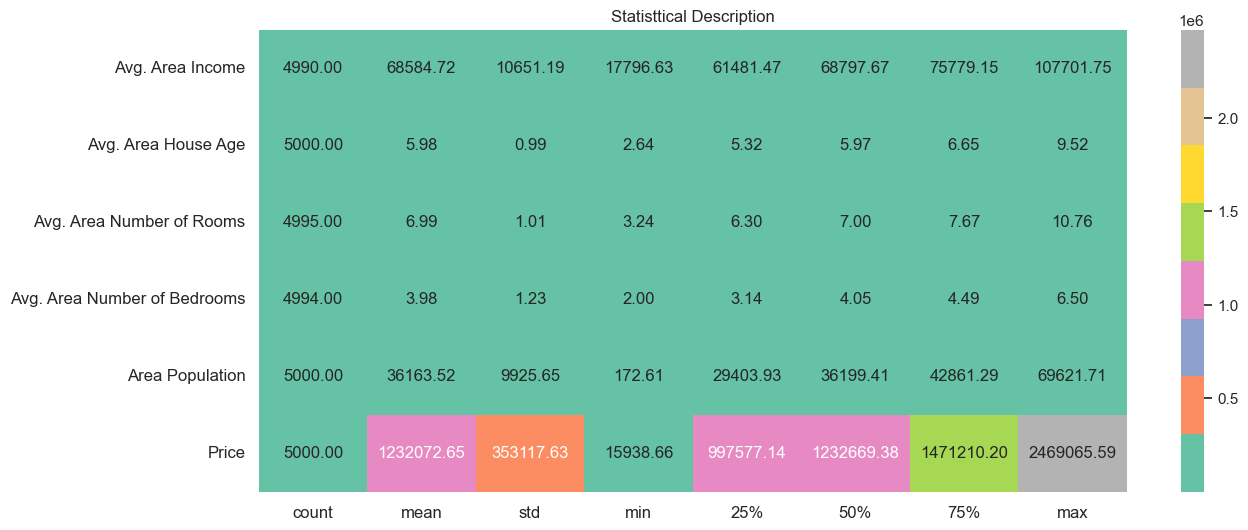

In [8]:

def descriptive_stats(df):
    desc = df.describe().round(2).T
    desc_df = pd.DataFrame(index = df. columns,
                          columns = desc.columns,
                          data = desc)
    
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statisttical Description')
    plt.show()

descriptive_stats(df)

# Removing Duplicate Rows

In [9]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

'No duplicate entries'

# Checking Null Value

In [10]:
null_details = {'col_name' : df.columns.tolist(),
                'col_type' : [df[col].dtype for col in df.columns],
                'null_col(%)' :  [df[col].isnull().sum()*100/len(df) for col in df.columns]}

df_null_details = pd.DataFrame(null_details)
df_null_details

col_name col_type  null_col(%)
0              Avg. Area Income  float64         0.20
1           Avg. Area House Age  float64         0.00
2     Avg. Area Number of Rooms  float64         0.10
3  Avg. Area Number of Bedrooms  float64         0.12
4               Area Population  float64         0.00
5                         Price  float64         0.00
6                       Address   object         0.00

In [11]:
# spliting numerical and non-numerical columns for missing value treatment

condition_obj = (df_null_details['null_col(%)'] == 0) & (df_null_details['col_type'] == 'O')
condition_num = (df_null_details['null_col(%)'] == 0) & (df_null_details['col_type'] != 'O')
row_to_delete_obj = df_null_details[condition_obj]
row_to_delete_num = df_null_details[condition_num]

df_null_obj = df_null_details[df_null_details['col_type'] == 'O'].drop(row_to_delete_obj.index, axis=0)
df_null_num = df_null_details[df_null_details['col_type'] != 'O'].drop(row_to_delete_num.index, axis=0)

null_obj_cols_list = df_null_obj.col_name.values.tolist()
null_num_cols_list = df_null_num.col_name.values.tolist()

#df_null_obj

print('object column having null values :', null_obj_cols_list,)
print('numeric column having null values :',  null_num_cols_list)


object column having null values : []
numeric column having null values : ['Avg. Area Income', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms']


# Missing value treatment of non-numerical column 

In [12]:
Thresh = 25
def null_obj_treatment(df):
    for col in null_obj_cols_list:
#----------------------- Checking percentage of null value-----
        null_percentage = df[col].isna().sum()*100/len(df)
        if null_percentage >= Thresh:
#-----------------null value more than Thresh  drop the column-----
            df[col].dropna(inplace=True , axis=1)
#-----------------------else  columns with fill null values--------
        else:   
            df[col].fillna(df[col].mode()[0], inplace = True)
    return 
               
            
null_obj_treatment(df)
df.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

# Missing value treatment of numerical column 

In [13]:
def null_num_treatment(df):
    for col in null_num_cols_list:
#----------------------- Checking percentage of null value-----
        null_percentage = df[col].isna().sum()*100/len(df)
        if null_percentage >= Thresh:
#-----------------null value more than Thresh  drop the column-----
            df[col].dropna(inplace=True, axis=1)
#-----------------------else  columns with fill null values--------
        else:   
            print('Check outlier for', '\"', col, '\"','and do proper imputation')
            print()
    return 

null_num_treatment(df)

Check outlier for " Avg. Area Income " and do proper imputation

Check outlier for " Avg. Area Number of Rooms " and do proper imputation

Check outlier for " Avg. Area Number of Bedrooms " and do proper imputation



## > outlier - check before imputation 

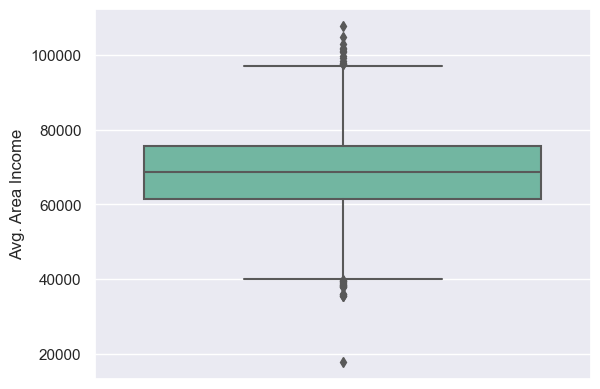

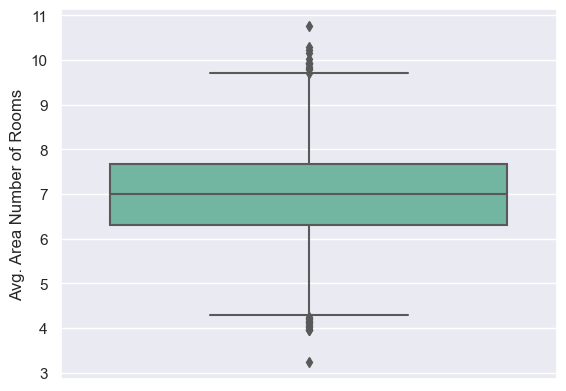

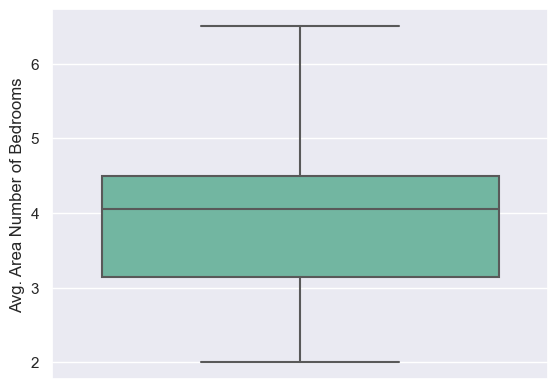

In [14]:
def boxplots(df,col):
    sns.boxplot(y = col, data = df, palette ='Set2' )
    plt.show()
    
for i in null_num_cols_list:
        boxplots(df,i)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [16]:
for col in null_num_cols_list:
    df[col].fillna(df[col].median(), inplace = True)

In [17]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# 📊 Exploratory Data Analysis (EDA)

Avg. Area Income                4991
Avg. Area House Age             5000
Avg. Area Number of Rooms       4995
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64


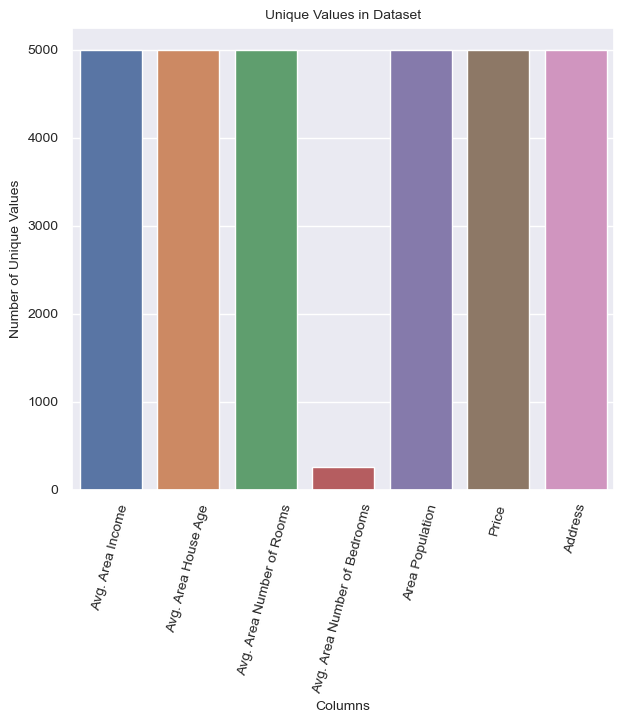

In [18]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique()
    print(unique_counts)
# Create a bar plot or count plot of unique values
    plt.figure(figsize=(7, 6))
    sns.barplot(x=unique_counts.index, y=unique_counts.values,)

    plt.xticks(rotation=75, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()

check_unquie_count(df)

In [19]:
num_not_cat = df.select_dtypes(exclude='object')
num_not_cat.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

In [20]:
outlier_list = list(num_not_cat.columns)

list_remove=['Price', "Avg. Area Number of Rooms" ]

for i in list_remove:
    outlier_list.remove(i)

outlier_list

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Bedrooms',
 'Area Population']

# Outlier Treatment (capping method)

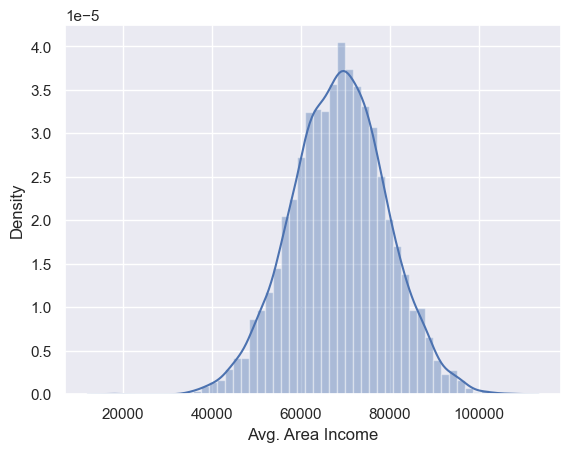

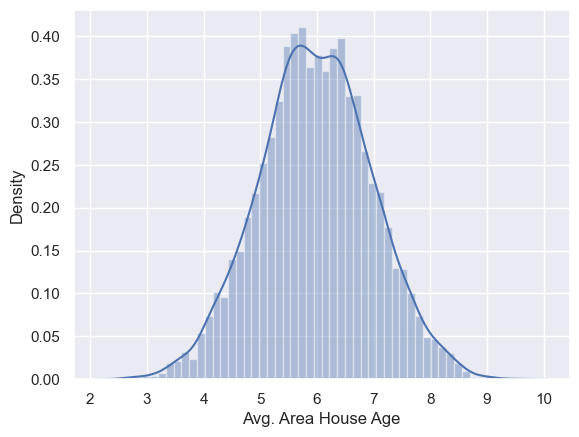

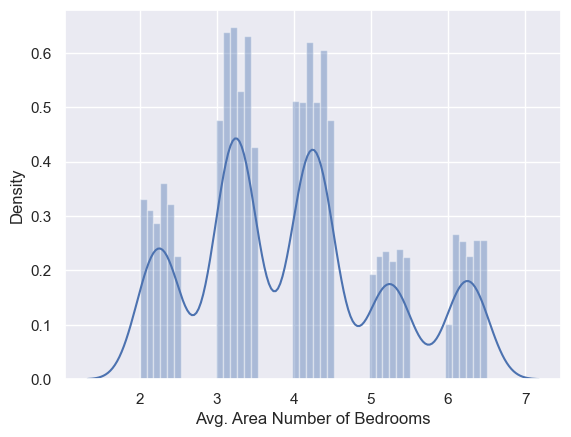

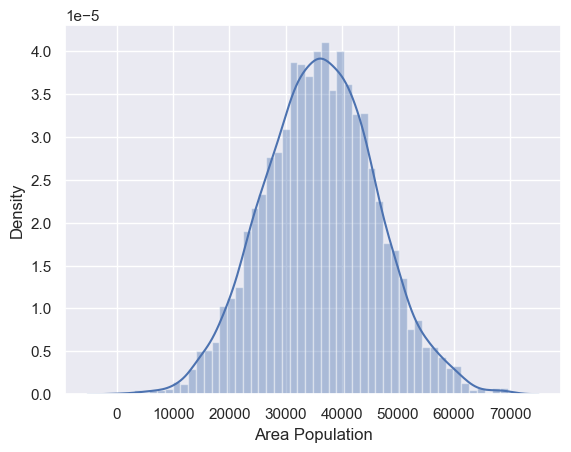

In [21]:
def distplots(df,col):
    sns.distplot(df[col], bins=50,kde=True)
    plt.show()
    
for i in outlier_list:
    distplots(num_not_cat,i)

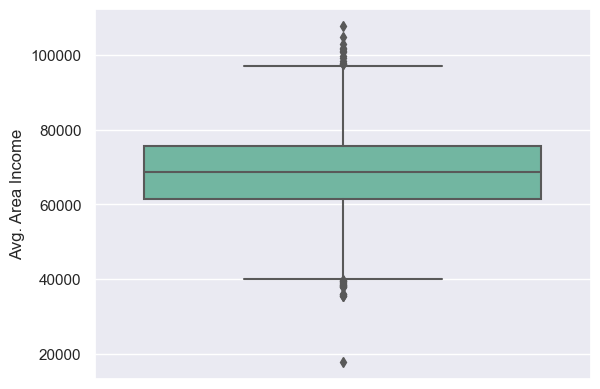

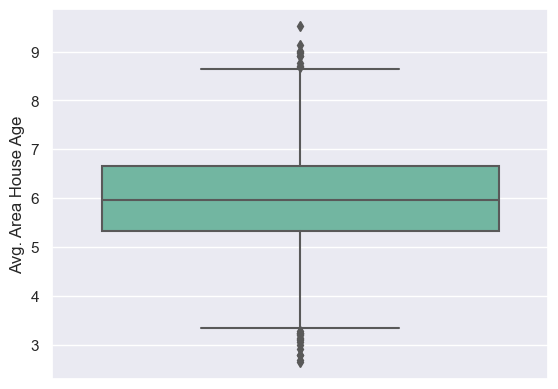

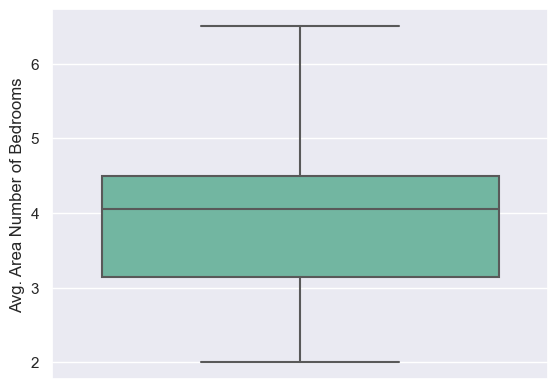

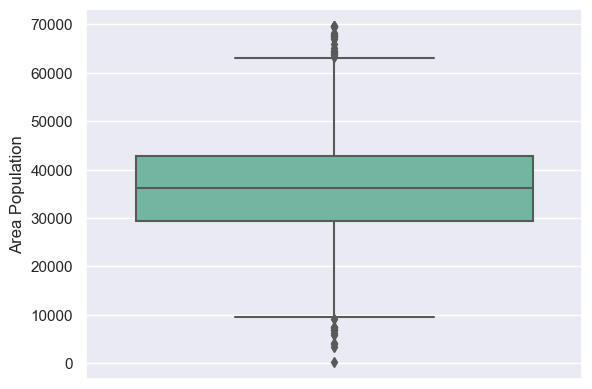

In [22]:
for col in outlier_list:
        boxplots(df,col)

## Approach-1 : for normal distribution ( $Z_{score} = \frac{actual - mean}{std}$ Method - capping):



In [23]:
#For normally distributed Columns:
#col_normal_dist = list[]   #normally_distributed_col
#upper_limit = new_df[col_normal_dist].mean() + 3* new_df[col_normal_dist].std()
#lower_limit = new_df[col_normal_dist].mean() - 3* new_df[col_normal_dist].std()
#print(upper_limit,lower_limit)
#capping the outlier with upper and lower limit 
#new_df[col_normal_distcol] = np.where(new_df[col_normal_dist] > upper_limit, upper_limit,
#                       np.where(new_df[col_normal_dist] < lower_limit, lower_limit, new_df[col_normal_dist]))
#new_df[col_normal_dist].describe()
#for col in col_normal_dist:
#    boxplots(new_df,col)

## Approach-2 : for skewness distribution (IQR Method - clipping):

In [24]:
def outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    return data.clip(upper_bound, lower_bound)

for col in outlier_list:
    df[col] = outlier(df[col])
   


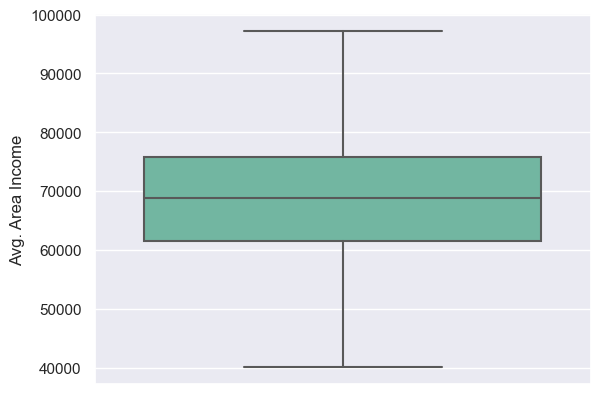

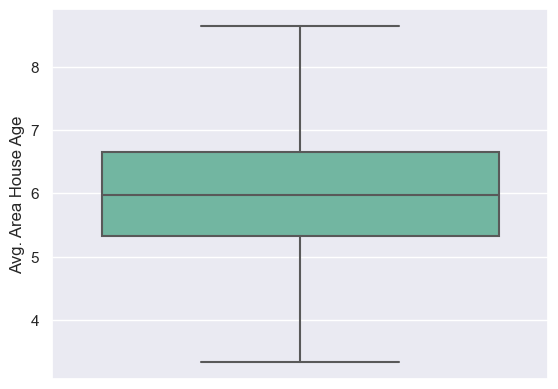

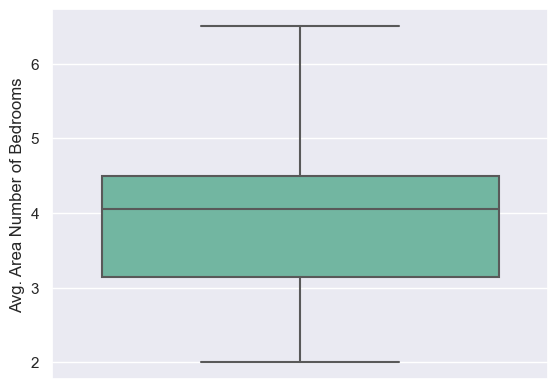

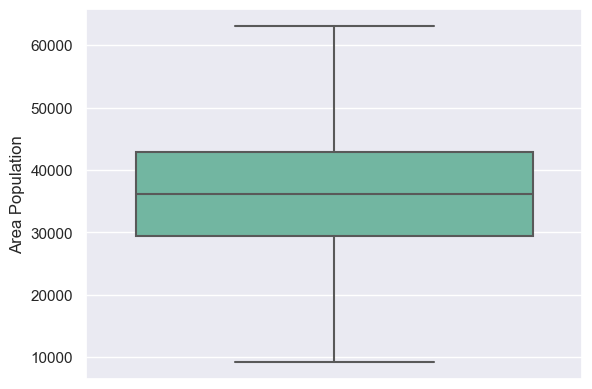

In [25]:
for col in outlier_list:
        boxplots(df,col)

# 📊 Exploratory Data Analysis (EDA)

### Bivariate Analysis

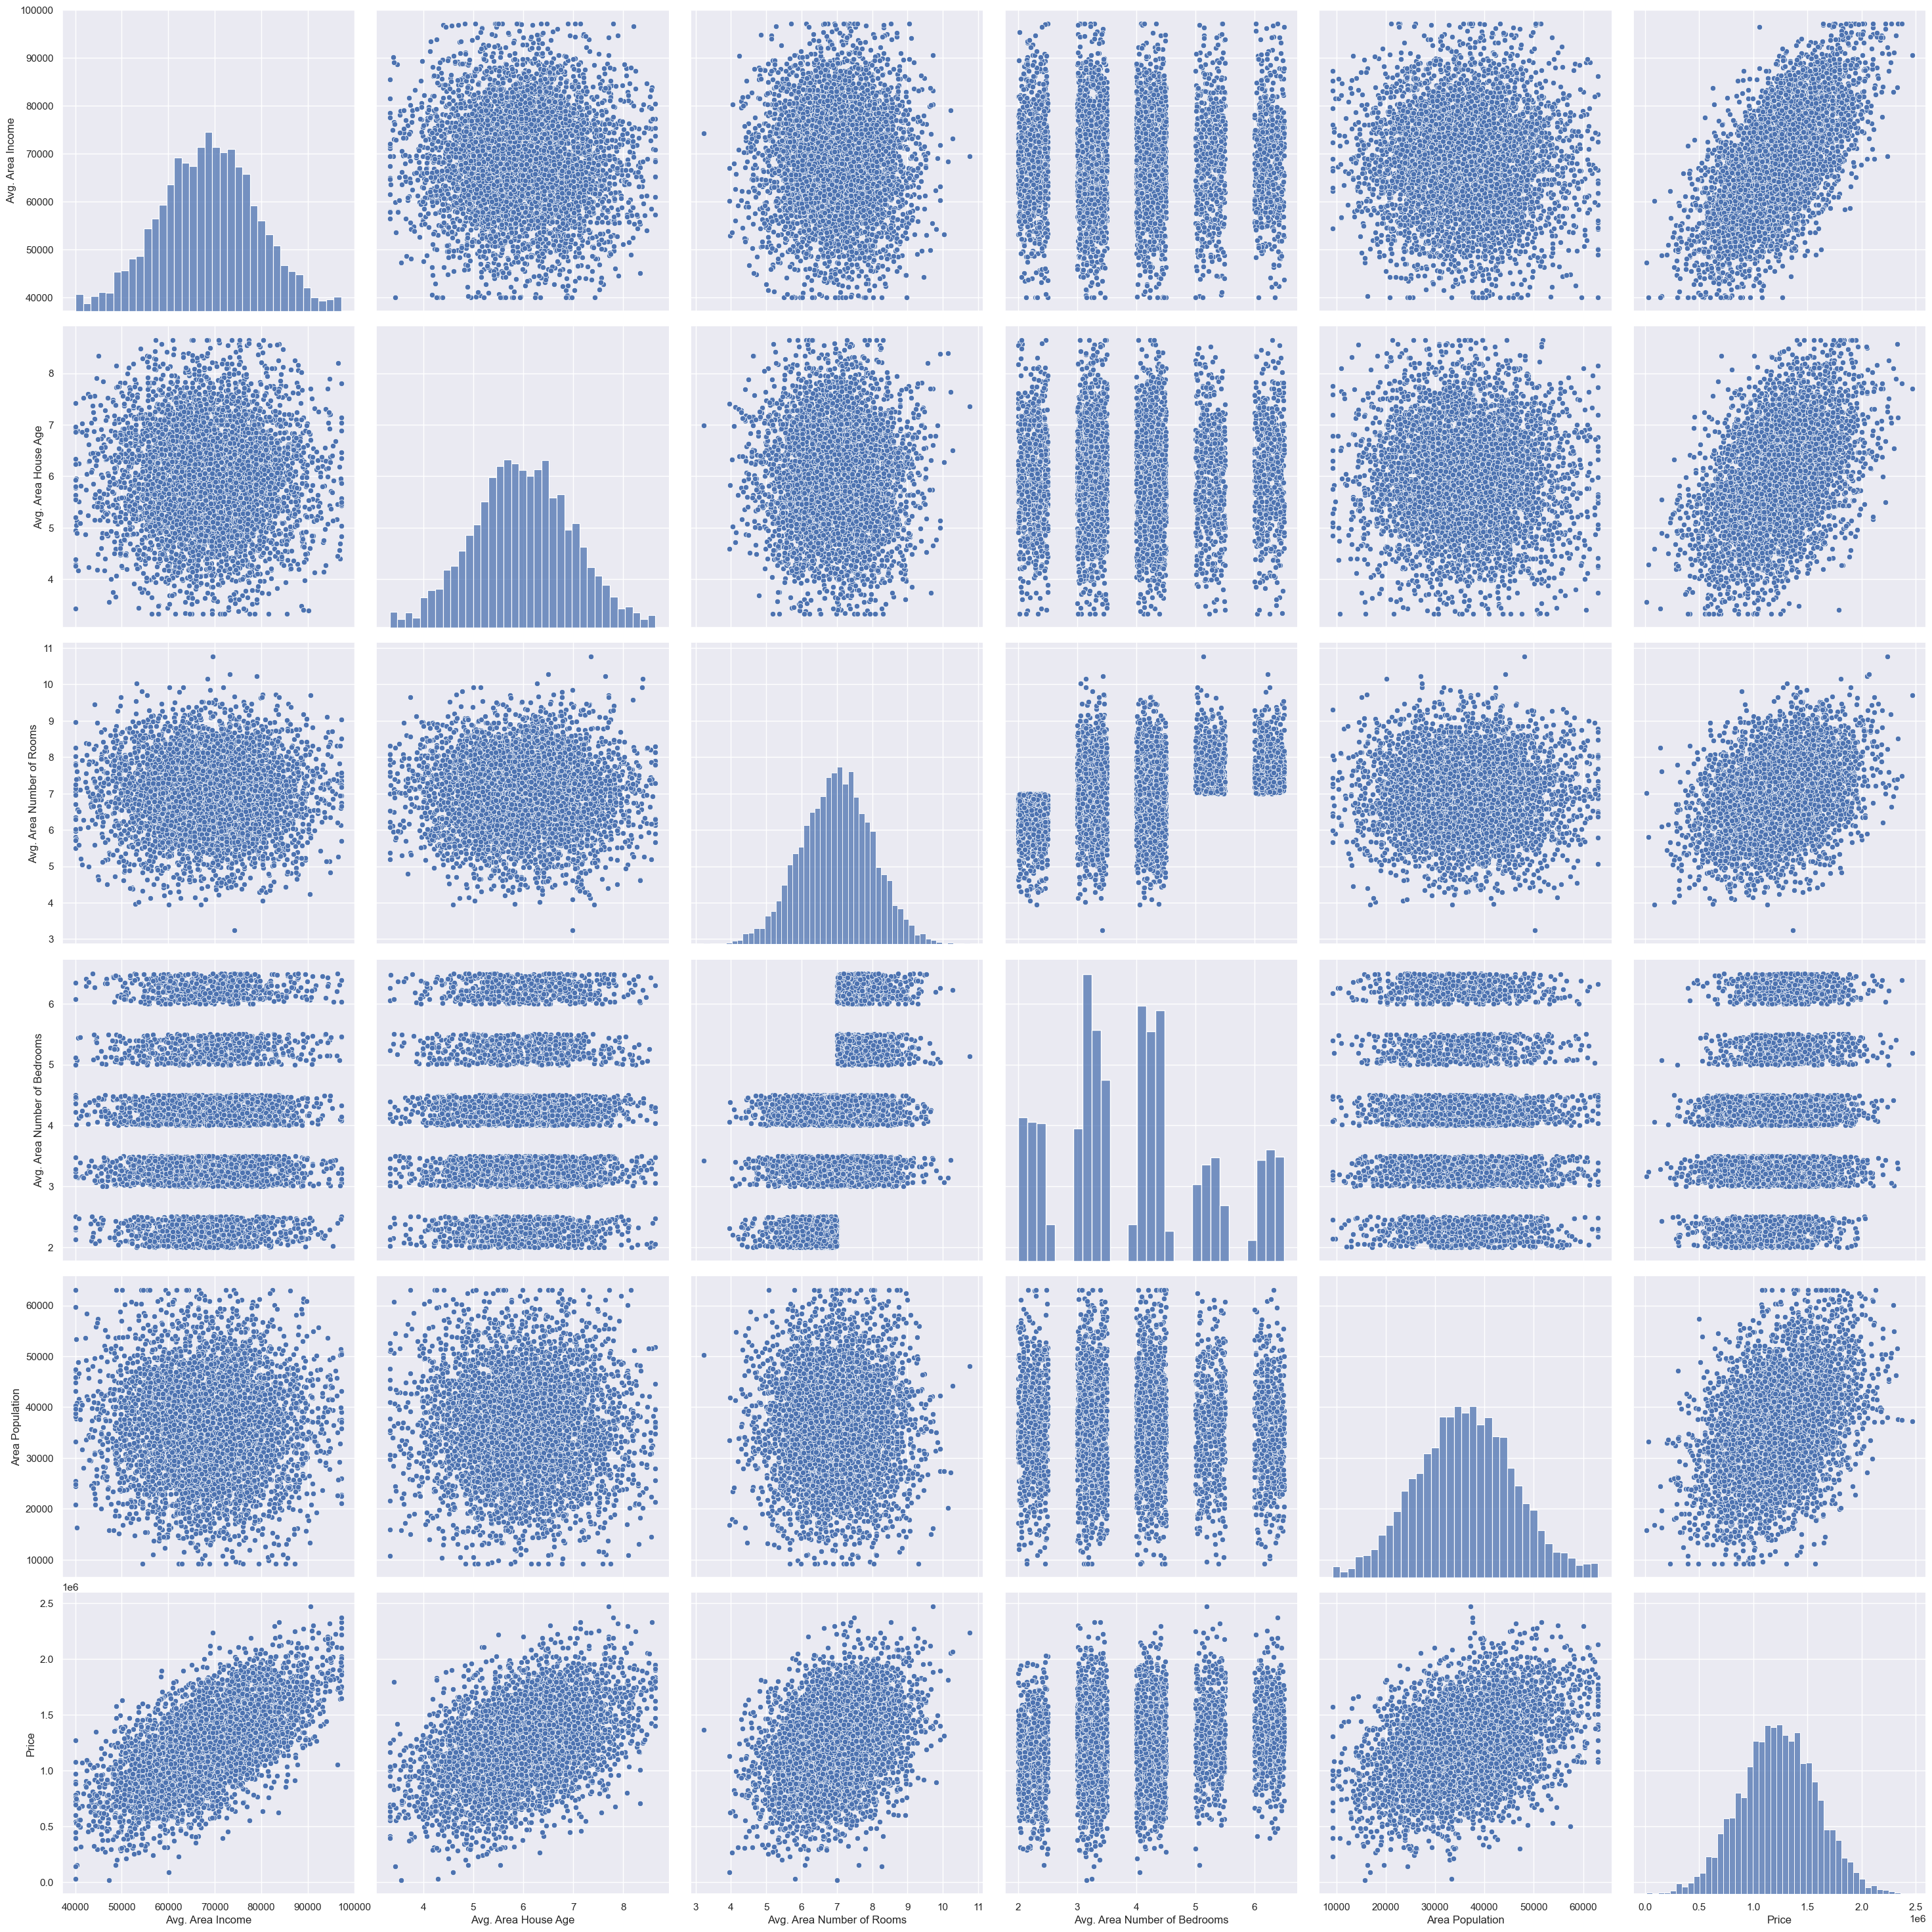

In [26]:
sns.pairplot(df, size = 5, kind = 'scatter') 

# 📈 Preaparation of Data before Training the algorithm


> To train our regression mode, the first step is to split up our data into an target(dependent variables) and features (predictors). And we need to do feature selection only on the predictors or independent variable. 

In [27]:
print('Adress feature has', df.Address.nunique(),'unique values' '\nData type is', df.Address.dtypes)


Adress feature has 5000 unique values
Data type is object


>In principle the object type data are treated under encoding. However, 'Address' feature can't be used for encoding, the feature is object type though.  It has 5000 unique values which will give 5000 extra features after doing one hot encoding when 'Address' is considered  as categorical feature. Eventaully complexity of the  model may arise overfitting of model. So we can safely drop it for our model building. 

In [28]:
# Address feature is not required for building the model

unnecessary_col_drop = 'Address'
df = df.drop(unnecessary_col_drop, axis = 1)
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09      23086.80050  1.059034e+06  
1                             3.09      40173.07217  1.505891e+06  
2                             5.13      36882.15940  1.058988e+06  
3                             3.26      34310.24283  1.260617e+06  
4                             4.23      26354.10947  6.309435e+05  
...                            ...              ...           ...  
4995                          3.46      22837.36103  1.060194e+06  
4996                          4.02      25616.11549  1.482618e+06  
4997                          2.13      33266.14549  1.030730e+06  
4998                          5.44      42625.62016  1.198657e+06  
4999                          4.07      46501.28380  1.298950e+06  

[5000 rows x 6 columns]

### Step-1: Spliting into dependent and independent variable


In [29]:
list(df)

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price']

In [30]:
# Assuming 'y' is the column name of the target variable
target = 'Price'
y = df[[target]]

# Assuming 'X' is the DataFrame containing the feature columns
features = df.drop(target, axis=1)
x = features

In [31]:
x.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09      23086.80050  
1                          3.09      40173.07217  
2                          5.13      36882.15940  
3                          3.26      34310.24283  
4                          4.23      26354.10947

In [32]:
x.shape

(5000, 5)

In [33]:
y.head()

Price
0  1.059034e+06
1  1.505891e+06
2  1.058988e+06
3  1.260617e+06
4  6.309435e+05

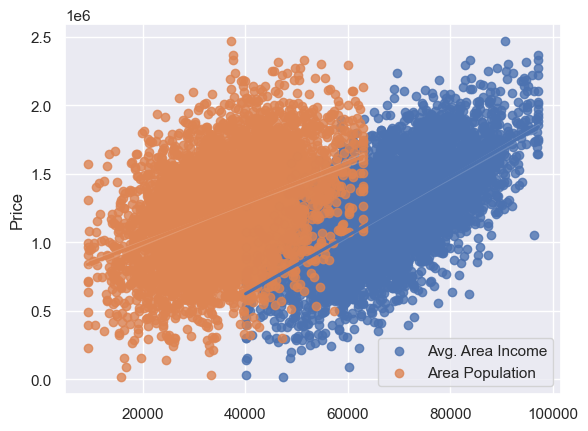

In [34]:
sns.regplot(x=x['Avg. Area Income'], y=y, label ='Avg. Area Income')
sns.regplot(x=x['Area Population'], y=y, label = 'Area Population')

plt.xlabel('')
plt.legend()


# Feature Scaling
- Feature scaling is done only on dependent variables. So we need to split the data into target and dependent variable.

In [35]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x)

In [36]:
sc_x

0         1         2         3         4
0     1.036382 -0.298541  0.021366  0.087582 -1.325622
1     1.008309  0.025747 -0.255524 -0.723031  0.407049
2    -0.690457 -0.113082  1.516928  0.930619  0.073326
3    -0.495800  1.226822 -1.393546 -0.585227 -0.187484
4    -0.813869 -0.949376  0.847161  0.201068 -0.994293
...        ...       ...       ...       ...       ...
4995 -0.758470  1.877474 -0.845840 -0.423104 -1.350917
4996  0.936679  1.035210 -0.408765  0.030839 -1.069131
4997 -0.491501  1.290004 -2.171046 -1.501219 -0.293363
4998 -0.055437 -0.448985  0.141680  1.181909  0.655755
4999 -0.291006  0.015012 -0.194335  0.071370  1.048775

[5000 rows x 5 columns]

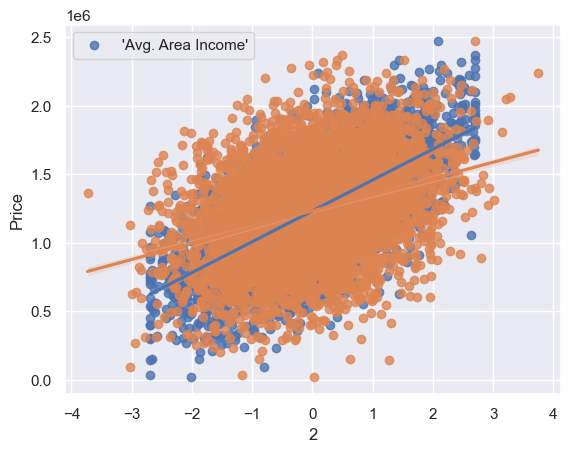

In [37]:
sns.regplot(x=sc_x[0], y=y, label ="'Avg. Area Income'")
sns.regplot(x=sc_x[2], y=y, label ="")
plt.legend()

In [38]:
sc_x.shape

(5000, 5)

In [39]:
sc_x.shape[1]   # no of columns

5

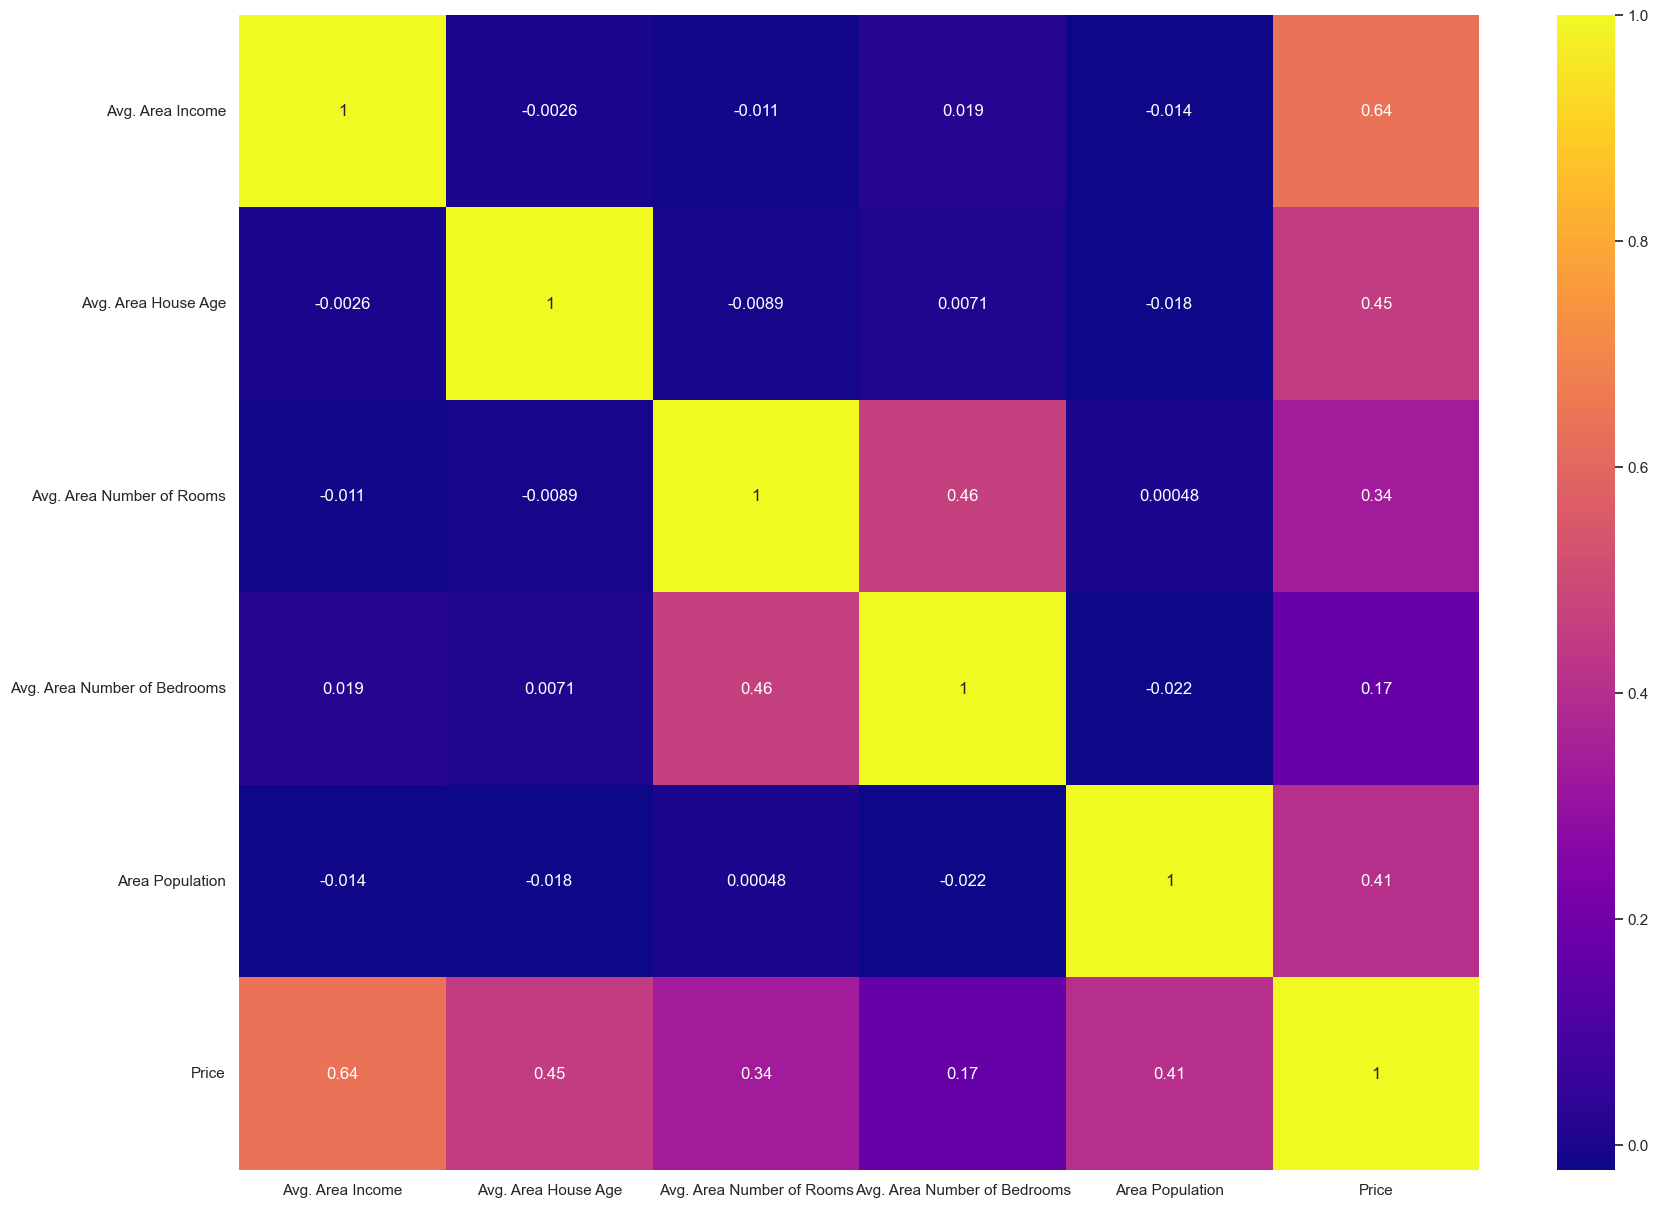

In [40]:
# Finding correlation
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='plasma')
plt.show()

# VIF (Multi-collinearity Check)

Multicollinearity refers to a situation in regression analysis where there is a high correlation between two or more predictor variables (also known as independent variables or features). It occurs when the predictor variables in a regression model are highly linearly related to each other, making it difficult to distinguish the individual effects of each variable on the dependent variable.

In the presence of multicollinearity, it becomes challenging to determine the true relationship between the predictor variables and the target variable. This is because multicollinearity can lead to unstable and unreliable estimates of the regression coefficients.


Identifying multicollinearity: Common methods to detect multicollinearity include calculating correlation matrices, variance inflation factors (VIF> 5).

Dealing with multicollinearity: If multicollinearity is detected , several strategies can be employed, 

- Dropping one or more correlated variables from the model.
(incase more than 1 features have VIF > 5, drop highest and need to perform VIF check again.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = sc_x
data = {'VIF' : [variance_inflation_factor(variable, i ) for i in range(len(sc_x.columns))],
        'Features' : x.columns}
     
vif = pd.DataFrame(data)

In [42]:
vif

VIF                      Features
0  1.001057              Avg. Area Income
1  1.000572           Avg. Area House Age
2  1.273047     Avg. Area Number of Rooms
3  1.273928  Avg. Area Number of Bedrooms
4  1.001143               Area Population

- for VIF > 5 refers to multicollinearity. For linear regression model building we need no or little  multicollinearitywe need to drop the feature. As we don't need multi-collinearity


# Split the data for building the model and  prediction


### Test size = 0.3
Split the data (70% Train and 30% Test)

In [43]:
# Split the data into training and test for building the model and for prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 5) (1500, 5) (3500, 1) (1500, 1)


## Approach no - 1 : LINEAR REGRESSION 📈📉



\begin{equation}
y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n + \varepsilon
\end{equation}

> where $\beta_0$ is intercept and $\beta_i$'s are slopes

### # Training

In [44]:
# Tain the model with LR model
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [45]:
# find the slopes and intercept from the trained model
intercept =LR.intercept_
slope =LR.coef_

print('The intercept for our linear model is :',intercept.round(3))
print()
print('The coefficients are :',slope.round(3))

The intercept for our linear model is : [-2632172.989]

The coefficients are : [[2.16130000e+01 1.64448733e+05 1.20867714e+05 1.39633900e+03
  1.51550000e+01]]


### # Prediction of target variable using Linear Regression model

In [47]:
# Predict house price by using linear Regression model with test dataset
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)
err_train = y_train - y_pred_train
err_test = y_test - y_pred_test

In [48]:
# Validate the actual price of the test data and predicted price
Test_accuracy = r2_score(y_test, y_pred_test)
Train_accuracy = r2_score(y_train, y_pred_train)

print ('Train accuracy :', Train_accuracy,'\n' 'Test accracy   :', Test_accuracy)

Train accuracy : 0.9136125526586425 
Test accracy   : 0.9208603911805919


In [62]:
err_train.skew()

Price   -0.009789
dtype: float64

In [61]:
# Assuming x_test.iloc[:,0] contains the actual values and y_pred_test contains the predicted values
data = pd.concat([x_test.iloc[:, 0].reset_index(drop=True), pd.Series(y_pred_test, name='Predicted')], axis=1)

# Create a scatter plot using seaborn
sns.scatterplot(x='Actual', y='Predicted', data=data)

ValueError: Data must be 1-dimensional

According to the histogram the error terms are normally distributed and that is then further confirmed by skewness and kurtosis which are close to zero.

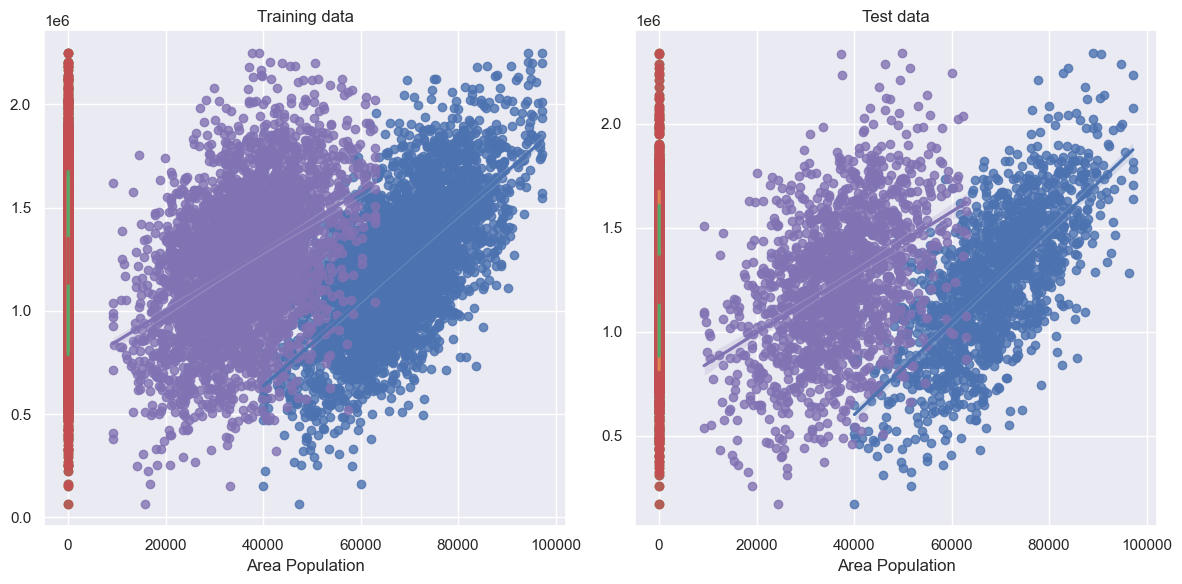

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot regression for training data
for i in range(len(x_train.columns)):
    sns.regplot(x=x_train.iloc[:, i], y=y_pred_train, ax=ax1)
    ax1.set_title('Training data')

# Plot regression for test data
for i in range(len(x_test.columns)):
    sns.regplot(x=x_test.iloc[:, i], y=y_pred_test, ax=ax2)
    ax2.set_title('Test data')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

##  Regression Evaluation Metrics (Performance Matrix)


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [50]:
# mse, rmse, mape
MSE = mean_squared_error(y_test,y_pred_test)
print(f'1. mean squared error (MSE) = ',MSE)
RMSE = np.sqrt(MSE)
print(f'2. root mean squared error (RMSE) = {RMSE}')
MAPE = mean_absolute_percentage_error(y_test,y_pred_test)
print(f'3. mean absolute percentage error (MAPE) = {MAPE}')
ACC = 100-MAPE*100
print(f'4. accuracy of the model = {ACC}')

1. mean squared error (MSE) =  10399993332.354975
2. root mean squared error (RMSE) = 101980.35758103113
3. mean absolute percentage error (MAPE) = 0.07586222558628034
4. accuracy of the model = 92.41377744137196


## Approach no 2 : Ordinary Least Square (OLS) Method

In [51]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [52]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()   # with unscaled data

In [53]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.890e+04
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                        0.00
Time:                        18:31:39   Log-Likelihood:                         -48343.
No. Observations:                3500   AIC:                                  9.670e+04
Df Residuals:                    3495   BIC:                                  9.673e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                 9.8382      0.319     30.823      0.000       9.212      10.464
Avg. Area House Age           5.061e+04   3544.862     14.277      0.000    4.37e+04    5.76e+04
Avg. Area Number of Rooms    -4317.0161   3895.456     -1.108      0.268    -1.2e+04    3320.583
Avg. Area Number of Bedrooms  2763.3880   3755.144      0.736      0.462   -4599.109    1.01e+04
Area Population                  8.0199      0.396     20.246      0.000       7.243       8.797
==============================================================================
Omnibus:                        0.025   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.030
Skew:                          -0.006   Prob(JB):                        0.985
Kurtosis:                       2.993   Cond. No.                     9.34e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
x1= x.drop(columns=['Avg. Area Number of Bedrooms', 'Avg. Area Number of Rooms'],axis =1)

- Endoginity Problem : if dependent variable is set wrongly that is endoginity problem

In [ ]:
# Check linearity

plt.scatter(y_test, y_pred_train)

In [ ]:
# Normality of Residual

sns.distplot((y_test - y_pred_price), bins=50)
plt.show()

#### 1) Linearity - Satisfied
#### 2) Normality of Residuals- Satisfied
#### 3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed)
#### 4) No autocorrelation - Satisfied
#### 5) No or little Multicollinearity - satisfied
#### 6) No endogenity problem - satisfied 

# Ridge

In [ ]:
# Part 2 : Ridge Regression (L2- Regularization)
# closure to zero but not exact zero
# penalty - 0.3
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))

In [ ]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [ ]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))

# Mean Absolute Error :

In [ ]:
from sklearn import metrics

In [ ]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred_price))

# Mean Absolute percent Error:
## $ MAPE =\frac{1}{n} $

In [ ]:
print("MAPE :", metrics.mean_absolute_error(y_test, y_pred_price)/100)

# Mean Squared Error (MSE)

In [ ]:
print("MSE :", metrics.mean_squared_error(y_test, y_pred_price))

# Root Mean Square Error (RMSE)

In [ ]:
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_price)))

# Gradient Descent 
- Always scaled data is used.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
gd = SGDRegressor()
gd.fit(x_train, y_train)

In [ ]:
y_pred_gd_train = gd.predict(x_train)

y_pred_gd_test = gd.predict(x_test)

In [ ]:
print("GD Trainging Accuracy :", r2_score(y_train, y_pred_gd_train))

print()

print("GD Test Accuracy :", r2_score(y_test, y_pred_gd_test))

# Ploynomial Regression

In [55]:
poly = PolynomialFeatures()
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [56]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

LinearRegression()

In [57]:
y_pred = lr.predict(x_test_trans)

In [58]:
r2_score(y_test, y_pred)

0.9204734487333968

In [59]:
y_pred_train = lr.predict(x_train_trans)

In [60]:
r2_score(y_train, y_pred_train)

0.9138926798519478